In [130]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap

In [131]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)}) # set plot info

In [158]:
# load in data
dataset = 'exemplar-002'
cells = pd.read_csv(f'~/Harvard/mcmicro/{dataset}/cell-states/fastpg/unmicst-{dataset}-clean.csv', index_col='CellID')
cells.head()

,FDX1_cellMask,CD357_cellMask,CD1D_cellMask,CD163_cellMask,CD3D_cellMask,CD31_cellMask,LDH_cellMask,CD66B_cellMask,VDAC1_cellMask,ELANE_cellMask,...,CD16_cellMask,ECAD_cellMask,FOXP3_cellMask,NCAM_cellMask,CD4_cellMask,KERATIN_cellMask,CD14_cellMask,IBA1_cellMask,CD1B_cellMask,CD8A_cellMask
CellID,,,,,,,,,,,,,,,,,,,,,
1,672.245283,264.245283,563.452830,496.415094,340.905660,472.754717,275.509434,196.452830,623.811321,540.396226,...,299.113208,522.943396,166.698113,879.150943,221.471698,24.377358,211.188679,240.679245,157.094340,222.716981
2,518.285714,196.678571,569.892857,473.357143,347.285714,466.785714,276.107143,191.785714,575.928571,510.142857,...,288.607143,535.428571,160.500000,842.964286,225.214286,28.142857,206.285714,223.535714,160.321429,209.821429
3,545.649123,221.157895,562.152047,464.111111,256.795322,417.567251,222.473684,165.058480,735.766082,487.912281,...,296.380117,527.251462,162.707602,850.473684,226.309942,85.315789,166.292398,251.508772,155.672515,231.280702
4,473.468531,223.153846,566.139860,456.993007,228.153846,412.615385,212.566434,168.608392,627.951049,475.258741,...,304.132867,530.048951,146.139860,828.944056,228.601399,54.846154,186.265734,245.755245,176.881119,243.839161
5,440.545455,223.704545,592.727273,458.681818,211.113636,407.454545,216.636364,156.568182,739.318182,483.977273,...,298.227273,530.568182,146.704545,830.727273,225.931818,53.272727,183.636364,254.340909,172.568182,229.227273


In [159]:
reducer = umap.UMAP() # create UMAP object
data = cells[list(cells.columns)].values # get data we want to use
# scaled_data = StandardScaler().fit_transform(data) # convert data into z-scores (this might not be necessary)
# log transform the data
transformer = FunctionTransformer(np.log10, validate=True)
log_data = transformer.transform(data)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_function_transformer.py:171: RuntimeWarning: divide by zero encountered in log10
  return func(X, **(kw_args if kw_args else {}))


In [ ]:
embedding = reducer.fit_transform(log_data) # train the reducer, letting it learn about the manifold
embedding.shape

In [170]:
# special for exemplar-002 data
dataset = 'exemplar-002'
cells = pd.read_csv(f'~/Harvard/mcmicro/unmicst-exemplar-002-clean-logicle.csv', index_col='CellID')
reducer = umap.UMAP() # create UMAP object
data = cells[list(cells.columns)].values # get data we want to use
embedding = reducer.fit_transform(data) # train the reducer, letting it learn about the manifold
embedding.shape

(42117, 2)

In [171]:
# load in cluster assignment info
CELLID = 'CellID'
CLUSTER = 'Cluster'
fastPG = pd.read_csv(f'~/Harvard/mcmicro/{dataset}/cell-states/fastpg/unmicst-{dataset}-cells.csv', delimiter=',', index_col=CELLID)
scanpy = pd.read_csv(f'~/Harvard/mcmicro/{dataset}/cell-states/scanpy/unmicst-{dataset}-cells.csv', delimiter=',', index_col=CELLID)
flowSOM = pd.read_csv(f'~/Harvard/mcmicro/{dataset}/cell-states/flowsom/unmicst-{dataset}-cells.csv', delimiter=',', index_col=CELLID)

Text(0.5, 1.0, 'UMAP projection of the exemplar-002 dataset (logicle transformed) with fastPG clusters')

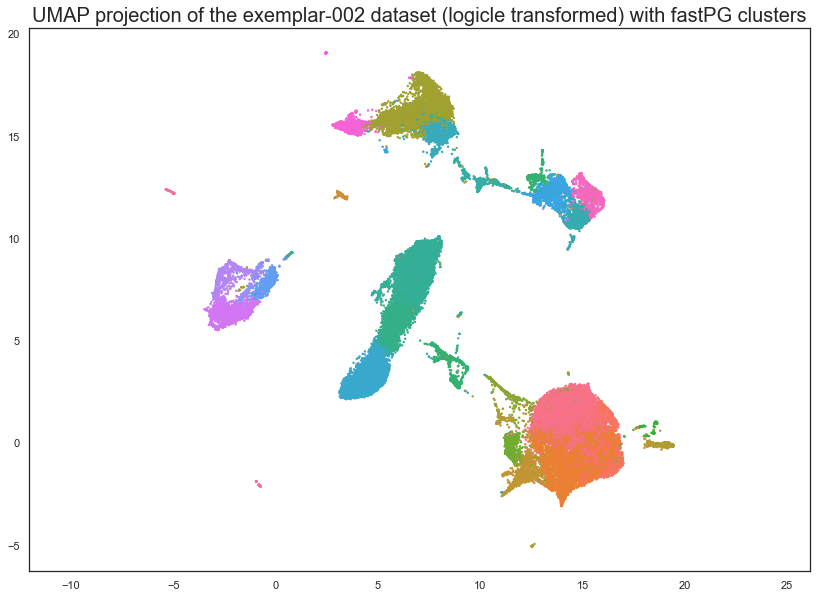

In [174]:
# plot UMAP
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=2,
    c = [sns.color_palette('husl', scanpy[CLUSTER].nunique())[x] for x in scanpy[CLUSTER]])
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'UMAP projection of the {dataset} dataset (logicle transformed) with scanpy clusters', fontsize=20)

In [165]:
flowSOM[CLUSTER].nunique()

25